In [1]:
%pylab notebook
from litex.soc.tools.remote import RemoteClient
import time
from scipy.signal import *
import sys
sys.path.append("../..")
from common import *
rcParams["axes.grid"] = True
rcParams["axes.grid.which"] = "both"

Populating the interactive namespace from numpy and matplotlib


In [7]:
fs = 120e6
def plotNpz(fNames, labels=None, ax=None, *args, **kwargs):
    """
    args, kwargs are passed to plot()
    """
    if ax is None:
        fig, ax = subplots(figsize=(9, 5))
    else:
        fig = gcf()
    if labels is None:
        labels = fNames
    for fName, label in zip(fNames, labels):       
        if fName == "fullscale":
            d = sin(arange(4095))
            dat = vstack([d, d])
        else:
            dat = load(fName)["dat"]
        f, Pxx = periodogram(dat, fs, window='hanning', scaling='spectrum', nfft=2**15)
        plot(f / 1e6, 10*log10(mean(Pxx, 0)) + 3, label=label, *args, **kwargs)
    ax.legend()
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("[db_fs]")
    fig.tight_layout()
    

# The DCM clock is everything but clean
Here it is compared to internal PLL_ADV clock and external Si570 as a ADC sampling clock. Did I accidentally enable spread spectrum modulation? Looks pretty bad.

<IPython.core.display.Javascript object>


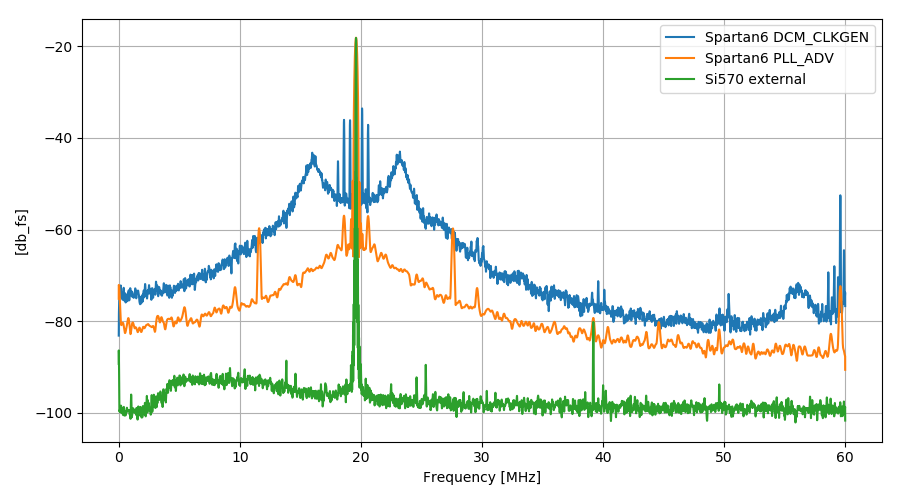

In [16]:
plotNpz(
    ["499_6MHz_10dBm_DCM.npz", "499_6MHz_10dBm_PLL.npz", "499_6MHz_10dBm_si570.npz"],
    ["Spartan6 DCM_CLKGEN", "Spartan6 PLL_ADV", "Si570 external"]
)

### Test tone at 499.6 MHz, sampled at 120 MHz, should end up at:

In [15]:
print("{:.3f} MHz".format(getNyquist(499.6, 120)))

19.600 MHz
